### Data Extraction

In [1]:
import pandas as pd
# Biblioteca que gera reports automaticos
import pandas_profiling as pp
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import gc
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
# Ajuda a otimizar o uso da memória
gc.enable()

In [2]:
ibov = pd.read_csv('^BVSP.csv')
print(ibov.dtypes)
ibov.head()

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object


,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-01-02,37550.0,40265.0,37550.0,40244.0,40244.0,1055200.0
1,2009-01-05,40243.0,41889.0,39526.0,41519.0,41519.0,1909200.0
2,2009-01-06,41520.0,42363.0,41520.0,42312.0,42312.0,1791000.0
3,2009-01-07,42308.0,42308.0,40563.0,40820.0,40820.0,1383600.0
4,2009-01-08,40819.0,41991.0,40251.0,41991.0,41991.0,1556000.0


In [3]:
dowj = pd.read_csv('^DJI.csv')
print(dowj.dtypes)
dowj.head()

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-01-02,8772.250000,9065.280273,8760.780273,9034.690430,9034.690430,213700000
1,2009-01-05,9027.129883,9034.370117,8892.360352,8952.889648,8952.889648,233760000
2,2009-01-06,8954.570313,9088.059570,8940.950195,9015.099609,9015.099609,215410000
3,2009-01-07,8996.940430,8996.940430,8719.919922,8769.700195,8769.700195,266710000
4,2009-01-08,8769.940430,8770.019531,8651.190430,8742.459961,8742.459961,226620000


In [4]:
exrate = pd.read_csv('USD_BRL Historical Data.csv')
print(exrate.dtypes)
exrate.head()

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Change %     object
dtype: object


,Date,Price,Open,High,Low,Change %
0,"Apr 19, 2019",3.9275,3.9275,3.9275,3.9275,0.00%
1,"Apr 18, 2019",3.9274,3.9409,3.9522,3.9047,-0.27%
2,"Apr 17, 2019",3.9382,3.9052,3.9477,3.8859,0.88%
3,"Apr 16, 2019",3.9040,3.8730,3.9085,3.8687,0.82%
4,"Apr 15, 2019",3.8723,3.8811,3.8908,3.8588,-0.25%


In [6]:
crb = pd.read_csv('CRBQX.csv')
print(crb.dtypes)
crb.head()

Index        object
Currency     object
Date         object
Price       float64
dtype: object


,Index,Currency,Date,Price
0,CRBQX,USD,2009-01-01,2171.85
1,CRBQX,USD,2009-01-02,2280.19
2,CRBQX,USD,2009-01-05,2320.80
3,CRBQX,USD,2009-01-06,2358.48
4,CRBQX,USD,2009-01-07,2326.84


### Cleaning

In [7]:
#icb.columns = ['Date', 'ICB']
series=[ibov,dowj,exrate,crb]
for serie in series:
    serie['Date'] = pd.to_datetime(serie['Date'])
    serie.set_index('Date', inplace=True)

In [12]:
df = ibov.loc[:,['Close']].join(
    dowj.loc[:,['Close']], lsuffix='IBOV', rsuffix='DJI').join(
    exrate.loc[:,['Price']],rsuffix='USDxBRL').join(
    crb.loc[:,['Price']],rsuffix='CRB').dropna()

In [13]:
df.head()

,CloseIBOV,CloseDJI,Price,PriceCRB
Date,,,,
2009-01-02,40244.0,9034.690430,2.3220,2280.19
2009-01-05,41519.0,8952.889648,2.2365,2320.80
2009-01-06,42312.0,9015.099609,2.1695,2358.48
2009-01-07,40820.0,8769.700195,2.2725,2326.84
2009-01-08,41991.0,8742.459961,2.2955,2325.68


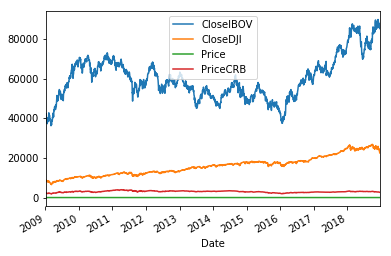

In [14]:
df.plot()

# Data Exploration

In [10]:
# abordagem: seguir passo a passo da 1a monografia aplicando a metodologia aqui nas series
# meta 1: usar modelos para checar se há significancia para operacao da lavajato
# meta 2: caso a aderencia fique muito bosta, seguir para abordagem usada na 2a monografia pro periodo em questao
# considerar usar "low" para ampliar range de variacao
# terminar a analise com os resultados - felizes ou nao - e comecar a escrever essa merda

Car Wash Operations days

In [25]:
big = ['2014-03-17','2014-04-11','2014-11-14',
       '2015-04-15','2015-06-19','2015-07-28','2015-08-03','2016-02-22',
       '2016-03-04','2016-09-22','2016-09-26','2016-11-17',
       '2017-07-27','2017-08-18','2018-11-23',
       '2014-07-01','2015-01-14','2015-02-05','2015-03-16','2015-03-27','2015-04-10','2018-03-09',#duvida de qual pertence
       '2015-07-02','2015-11-24','2016-03-22','2016-04-12','2016-05-23','2016-05-24','2016-07-04', #duvida de qual pertence
       '2018-05-08','2018-09-26'] #duvida de qual pertence
med = ['2014-03-20','2014-06-11','2014-08-22','2015-05-21','2015-08-13','2015-09-21','2015-11-16','2016-01-27',
       '2016-03-21','2016-04-01','2016-07-07','2016-08-02','2016-11-10','2017-02-23','2017-03-28','2017-05-04',
       '2017-05-26','2017-08-23','2017-10-20','2017-11-21','2018-02-22','2018-03-23','2018-06-21','2018-09-11',
       '2018-09-25','2018-11-05']
no_ops = [
    '2015-03-06', # lista de janot
    '2017-05-18' # audios joesley batista
]

In [26]:
dates=[]
for conj in (big,med,no_ops):
    for date in conj:
        dates.append(date)

In [29]:
df['CarWash']= 0
df.loc[df.index.isin(pd.to_datetime(dates)),'CarWash'] = 1 

In [30]:
#df['CarWash_big']=0
#df.loc[df.index.isin(pd.to_datetime(big)),'CarWash_big'] = 1 
#df['CarWash_med']=0
#df.loc[df.index.isin(pd.to_datetime(med)),'CarWash_med'] = 1 

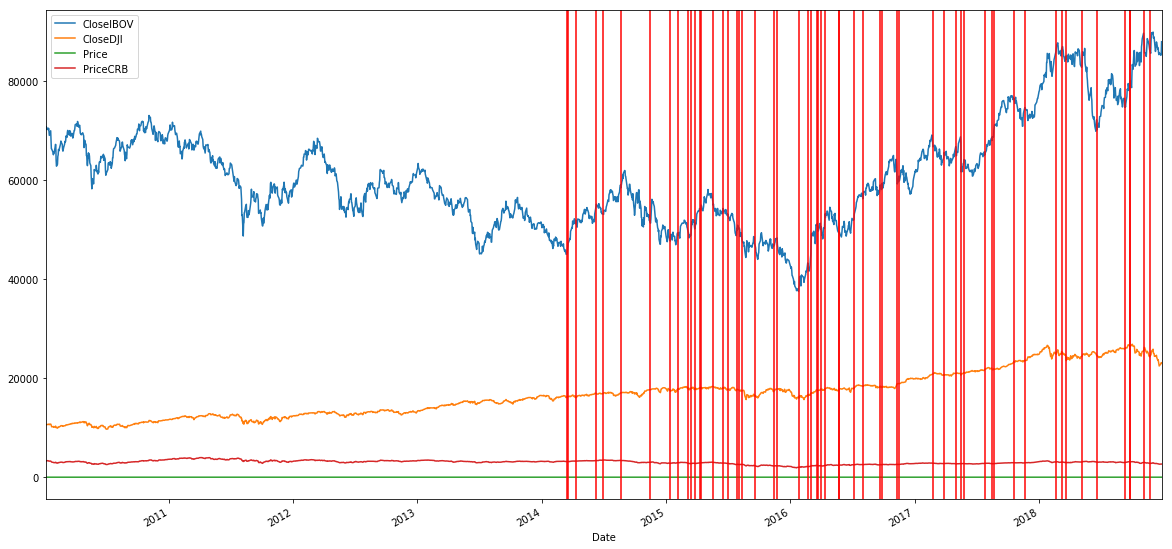

In [31]:
df.loc[df.index > '2010-01-01',:'PriceCRB'].plot(figsize = (20,10))
xcoords = df.loc[df.CarWash == 1,:].index
for xc in xcoords:
    plt.axvline(x=xc,color='red')

### Data Manipulation

In [49]:
def log_diff_app(df,tss,diffs=1):
    #new_df = pd.DataFrame(index=df.index)
    for ts in tss:
        df['l_'+str(ts)] = np.log(df[ts]).diff(diffs)
    df.dropna(inplace=True)
    return(df)  

In [50]:
df_f = log_diff_app(df.loc[df.index > '2010-01-01',:], df.loc[:,:'PriceCRB'].columns)

In [55]:
df_f.nsmallest(10, 'l_CloseIBOV')

,CloseIBOV,CloseDJI,Price,PriceCRB,CarWash,l_CloseIBOV,l_CloseDJI,l_Price,l_PriceCRB
Date,,,,,,,,,
2017-05-18,61597.0,20663.019531,3.3710,2707.393105,1,-0.092107,0.002718,0.071624,-0.006437
2011-08-08,48668.0,10809.849609,1.6265,3170.160000,0,-0.084307,-0.057061,0.031604,-0.054692
2011-08-04,52811.0,11383.679688,1.5873,3396.610000,0,-0.058936,-0.044059,0.016003,-0.055252
2016-02-02,38596.0,16153.540039,3.9895,1989.610636,0,-0.049880,-0.018136,0.006690,-0.033169
2011-09-22,53280.0,10733.830078,1.9033,2982.150000,0,-0.049469,-0.035780,0.010298,-0.070141
2010-02-04,63934.0,10002.179688,1.8739,2889.610000,0,-0.048467,-0.026478,0.012566,-0.040397
2014-09-29,54625.0,17071.220703,2.4470,3136.668138,0,-0.046272,-0.002453,0.011095,-0.006455
2014-12-01,52277.0,17776.800781,2.5600,2933.056518,0,-0.044649,-0.002889,-0.002302,0.000034
2013-07-02,45229.0,14932.410156,2.2546,2957.660000,0,-0.043291,-0.002845,0.011734,-0.002644


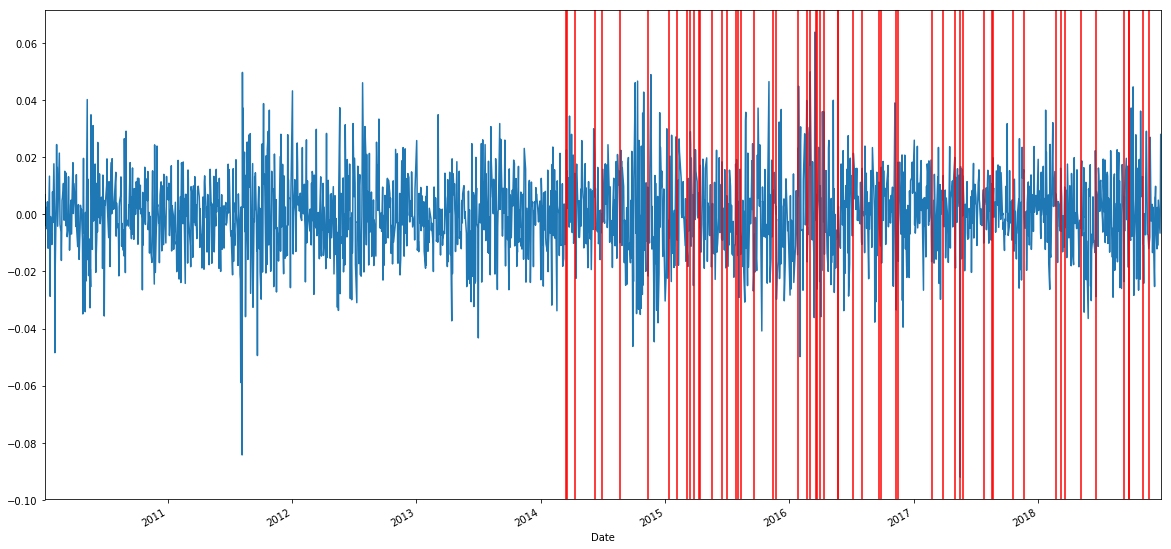

In [56]:
df_f.loc[:,'l_CloseIBOV'].plot(figsize = (20,10))
for xc in xcoords:
    plt.axvline(x=xc,color='red')

In [60]:
df_f.groupby('CarWash').mean()

,CloseIBOV,CloseDJI,Price,PriceCRB,l_CloseIBOV,l_CloseDJI,l_Price,l_PriceCRB
CarWash,,,,,,,,
0,60817.957306,16547.594730,2.598794,3023.584030,0.000098,0.000327,0.000304,-0.000105
1,59409.362069,19553.493282,3.280643,2754.789473,0.000362,0.001529,0.002969,0.000539


In [61]:
df_f.to_csv('bicudo_mono_dados.csv')

### Statiscal Analysis

ADF TEST for Estacionarity

In [17]:
def adf_pvalue(df, ts):
    x=sm.tsa.stattools.adfuller(df[ts])
    print('The '+ts+' ADF pvalue is '+str(x[1]))

In [18]:
for series in df_f.loc[:,:'ICB'].columns:
    adf_pvalue(df_f,series)

The LowIBOV ADF pvalue is 0.8398571703860871
The LowDJI ADF pvalue is 0.9665772167438605
The Low ADF pvalue is 0.6700074003893479
The ICB ADF pvalue is 0.22783416248966265


In [21]:
# Rejeita-se H0 (haver raiz unitária) à 1a diferenca
for series in df_diff_1.columns:
    adf_pvalue(df_diff_1,series)

The LowIBOV ADF pvalue is 0.0
The LowDJI ADF pvalue is 0.0
The Low ADF pvalue is 3.7492649080224264e-30
The ICB ADF pvalue is 0.0


### Escolha do VAR mais adequado

In [61]:
endog = df_diff_1.loc[:,:'CarWash']
exog = df_diff_1[['CarWash']]

In [64]:
model=sm.tsa.VAR(endog)
model.select_order(5, trend='nc').summary()

,AIC,BIC,FPE,HQIC
0,-41.43,-41.32,1.013e-18,-41.39
1,-41.43*,-41.20*,1.017e-18*,-41.34*
2,-41.40,-41.06,1.043e-18,-41.28
3,-41.39,-40.93,1.061e-18,-41.22
4,-41.36,-40.79,1.088e-18,-41.15


In [65]:
res=model.fit(1, trend='nc')
res.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 07, May, 2019
Time:                     00:35:26
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -41.3296
Nobs:                     1103.00    HQIC:                  -41.4001
Log likelihood:           15055.4    FPE:                1.00352e-18
AIC:                     -41.4430    Det(Omega_mle):     9.81080e-19
--------------------------------------------------------------------
Results for equation LowIBOV
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
L1.LowIBOV         0.076504         0.034150            2.240           0.025
L1.LowDJI          0.066602         0.054131            1.230           0.219
L1.Low            -0.176234         0.051099           -3.449         

Cointegration Test

In [66]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
x=coint_johansen(df_f.loc[:,:'ICB'], det_order=1, k_ar_diff=2)

In [53]:
x.cvt

array([[51.6492, 55.2459, 62.5202],
       [32.0645, 35.0116, 41.0815],
       [16.1619, 18.3985, 23.1485],
       [ 2.7055,  3.8415,  6.6349]])

VAR Granger Causality/Block ExogeneityWald Tests

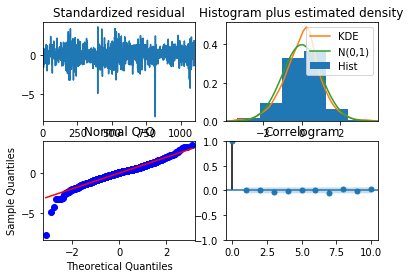

In [70]:
res.plot_diagnostics()
plt.show()

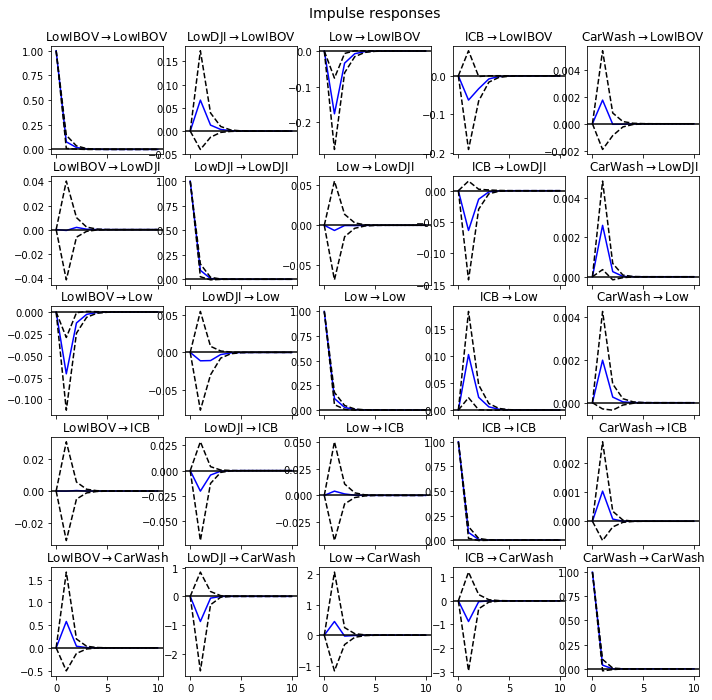

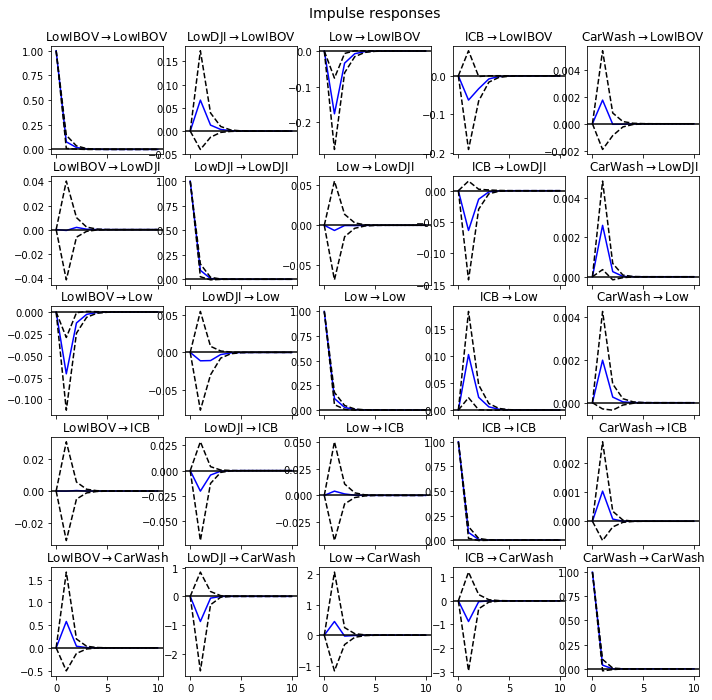

In [67]:
irf = res.irf(10) # 10 periods
irf.plot()

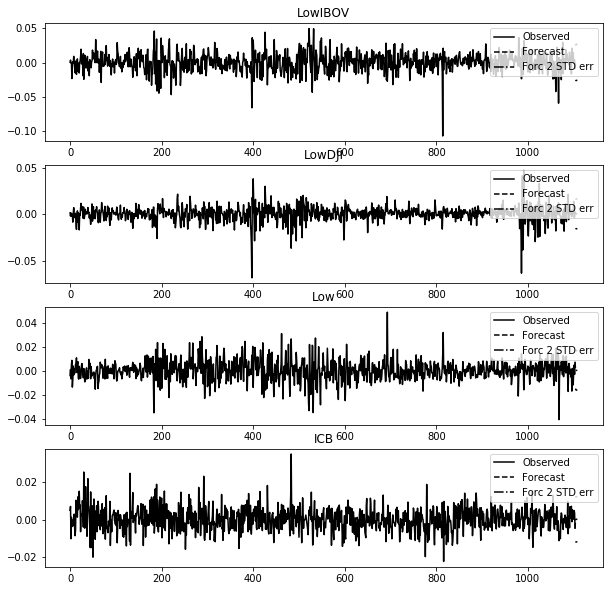

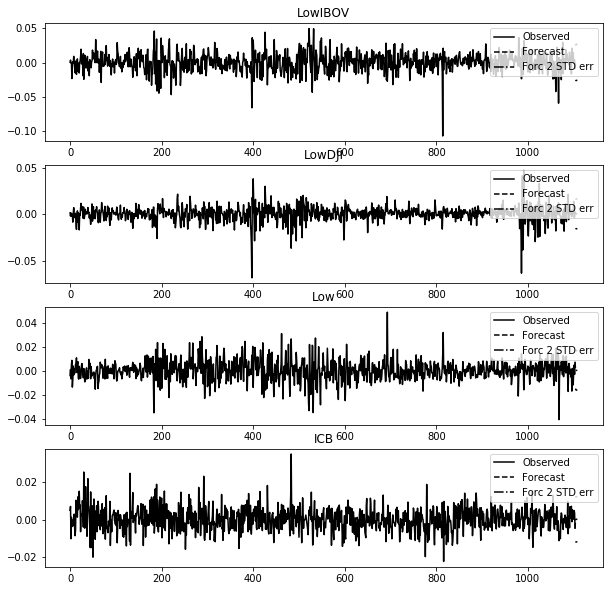

In [155]:
res.plot_forecast(5)

In [68]:
res.test_causality('CarWash','LowIBOV').summary()

Test statistic,Critical value,p-value,df
1.093,3.843,0.296,"(1, 5490)"
